In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('flights')
df = df.head(50)
print(df.shape)
df.head()

(50, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
df['year'] = df['year'].astype('str')
df['month'] = df['month'].astype('str')
df['Date'] = pd.to_datetime(df['month'] + '-' + df['year'] )
df.set_index('Date',inplace=True)
df.head()

,year,month,passengers
Date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<AxesSubplot:title={'center':'Passengers x Time'}, xlabel='Date', ylabel='Passengers'>

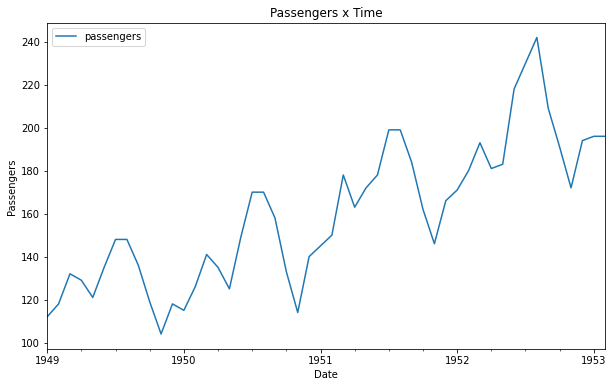

In [6]:
df.plot(kind='line',y='passengers',
        figsize=(10,6),
        title='Passengers x Time', xlabel='Date', ylabel='Passengers'
        )

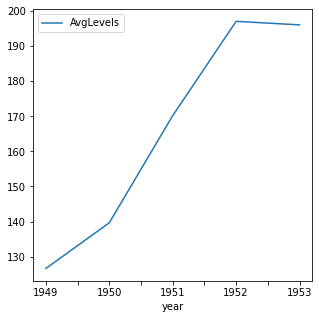

In [7]:
(df
 .groupby(by=['year'],as_index=False)
 .agg(AvgLevels=('passengers','mean'))
 .plot(kind='line',x='year',y='AvgLevels', figsize=(5,5))
 )
plt.show()

In [8]:
df['Col1'] = 300 + 20 * np.random.randn(df.shape[0]) + np.random.randint(low=-10, high=20, size=df.shape[0])
df.head()

,year,month,passengers,Col1
Date,,,,
1949-01-01,1949,Jan,112,300.055201
1949-02-01,1949,Feb,118,312.713380
1949-03-01,1949,Mar,132,284.100500
1949-04-01,1949,Apr,129,327.654598
1949-05-01,1949,May,121,314.276115


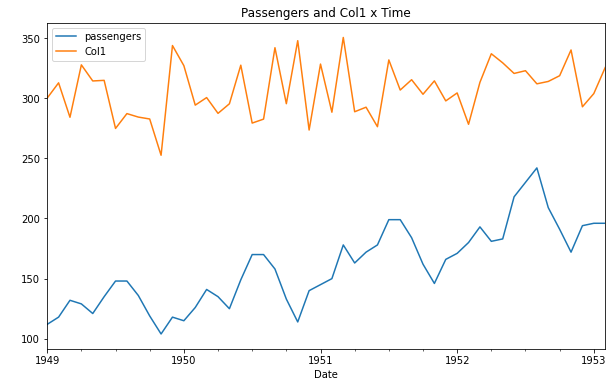

In [9]:
df.plot(kind='line',y=['passengers','Col1'],
        figsize=(10,6),
        title='Passengers and Col1 x Time', xlabel='Date', ylabel=' '
        )
plt.show()

In [10]:
data = {'Product':['Bread','Bread','Milk','Milk','Milk','Butter','Butter','Butter'],
        'Person':['Anna','Anna','Brian','John','John','Carl','Sarah','Anna'],
        'Sales':[200,120,340,124,243,350,500,240],
        'Quantity':[3,5,3,8,2,7,5,4],
        'Margin':[100,20,280,50,100,67,300,200]}

df_practice = pd.DataFrame(data)
df_practice

,Product,Person,Sales,Quantity,Margin
0,Bread,Anna,200,3,100
1,Bread,Anna,120,5,20
2,Milk,Brian,340,3,280
3,Milk,John,124,8,50
4,Milk,John,243,2,100
5,Butter,Carl,350,7,67
6,Butter,Sarah,500,5,300
7,Butter,Anna,240,4,200


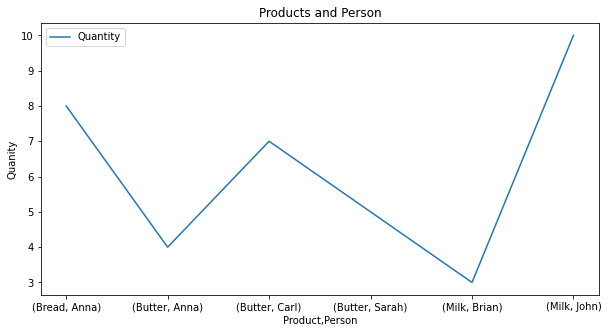

In [26]:
df_practice.groupby(['Product', 'Person'])['Quantity'].sum().plot(
        kind='line', 
        y='Quantity', 
        figsize=(10, 5), 
        title='Products and Person', 
        ylabel='Quanity',
        legend = 'Quantity')

plt.show()
